<a href="https://colab.research.google.com/github/rajan-dhinoja/Machine_Learning/blob/main/Part-2%20-%20Regression/Section%208%20-%20Decision%20Tree%20Regression/decision_tree_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree Regression Tutorial...**


# ***Step-A: Data Preprocessing:-***

## Step-1: Importing the necessary Libraries, Modules and Classes...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Step-2: Importing the Dataset & Printing it...

In [2]:
dataset = pd.DataFrame(pd.read_csv('position_salaries.csv'))
dataset.head()
# dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Step-3: Creating the matrix of features (X) and the dependent variable/output (y) & Printing Both

In [3]:
X = dataset.iloc[:, 1:-1].values # Here :-1 means a range of displaying all the column except the column with index -1, which is not included.
y = dataset.iloc[:, -1].values # Here -1 means only the last column.
print("Matrix of Features: \n", X)
print("\n")
print("Dependent Variable/Output: \n", y)

Matrix of Features: 
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


Dependent Variable/Output: 
 [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Step-4: Cheking any Missing Data and their counts & Printing it...

In [4]:
missing_counts = dataset.isnull().sum()
if missing_counts.any():
    print("Missing Data Counts: \n", missing_counts)
    print("\n")
    missing_values = dataset.isnull()
    print("Missing Data Values: \n", missing_values)
else:
    print("No missing data found.")

No missing data found.


## Step-5: Checking any Categorical Data and Encoding them:-

In [5]:
# We iterate through each column name (dataset.columns)
# For each column, we select it using dataset[column]
# Then, we apply .unique() to get the unique values and print them.
# dataset[column].dtype retrieves the data type of the current column.

categorical_columns_found = False  # Flag to track if any categorical columns are found

for column in dataset.columns:
    if dataset[column].dtype == 'object':
        categorical_columns_found = True  # Set the flag to True
        print(f"String Values present in Column '{column}'.")

        # Check for repeating values within the categorical column
        value_counts = dataset[column].value_counts()
        repeating_values = value_counts[value_counts > 1].index.tolist()

        if repeating_values:
            print(f"> Also, Categorical values found in column '{column}': {repeating_values}.")
        else:
            print(f"> But No Categorical values found in column '{column}'.")

if not categorical_columns_found:  # Check the flag after processing all columns
    print("No categorical values found in the whole dataset.")


String Values present in Column 'Position'.
> But No Categorical values found in column 'Position'.


## Step-6: Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
print("Printing Training Sets:")
print("> X_train: \n", X_train)
print("> X_test: \n", X_test)
print("\n")
print("Printing Test Sets:")
print("> y_train: \n", y_train)
print("> y_test: \n", y_test)

Printing Training Sets:
> X_train: 
 [[7]
 [5]
 [1]
 [4]
 [2]
 [8]
 [9]
 [6]]
> X_test: 
 [[ 3]
 [10]]


Printing Test Sets:
> y_train: 
 [200000 110000  45000  80000  50000 300000 500000 150000]
> y_test: 
 [  60000 1000000]


## Step-7: Feature Scaling
{ -> Feature scaling is not typically required for decision tree regression because the algorithm is not sensitive to the scale of features and scaling does not improve the model's performance or interpretability. By avoiding scaling, you can keep the model simpler and easier to understand.

-> The Predictions from Decision tree are resulting from sucessive splits os the data through the different nodes of your tree.}

# ***Step-B: Decision Tree Regression Model:-***

## Training the Decision Tree Regression model on the whole dataset

In [8]:
# DecisionTreeRegressor is the specific class we need to create a decision tree model for regression tasks (predicting a continuous value).
from sklearn.tree import DecisionTreeRegressor

# random_state=0 is an argument passed to the DecisionTreeRegressor. Setting it to a fixed value (like 0) ensures that the tree is built the same way each time the code is run. This makes the results reproducible.
regressor = DecisionTreeRegressor(random_state=0)

# This is where the actual training happens! The fit method is used to train the decision tree model on our data.
# X represents the matrix of features (independent variables) from our dataset. These are the inputs used to make predictions.
# y represents the dependent variable (the target we're trying to predict) from our dataset.
# This line essentially tells the model: "Learn the relationship between X and y so you can make predictions later."
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

## Predicting a new result

In [9]:
# Result might not be so good, bcoz Decision Tree model is not for single feature dataset...

# regressor is the trained Decision Tree Regression model.
# .predict() is a method that's used to make predictions using the model.
# [[6.5]] is the input data that's being provided to the model for prediction. It's enclosed in double square brackets because the predict method expects a 2-dimensional array-like object, even if you're only predicting for a single data point. In this case, 6.5 likely represents a value for the feature 'Position Level' within the dataset.

# regressor.predict([[6.5]])

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[  60000.   60000.]
 [1000000. 1000000.]]


## Visualising the Decision Tree Regression results (higher resolution)

<ipython-input-10-f01f1f90e1d1>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


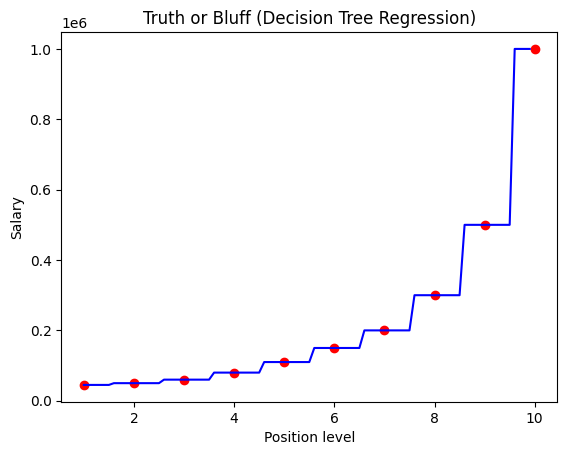

In [10]:
# np.arange(min(X), max(X), 0.1): This line uses NumPy's arange function to create a sequence of values starting from the minimum value in the feature matrix X to the maximum value, with a step of 0.1. This essentially creates a range of values for the 'Position Level' feature.
# X_grid = X_grid.reshape((len(X_grid), 1)): This line reshapes the X_grid array into a column vector. This is necessary because the predict method of the regressor expects input in this format.
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color = 'red')

# regressor.predict(X_grid): This part uses the trained Decision Tree model (regressor) to predict the salary values for each position level in X_grid.
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


## Evaluating the Model Performance:-

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0